In [10]:
import chilife as xl
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
plt.style.use('chiLife')

In [11]:
mbp = xl.fetch('1omp')
SL1 = xl.SpinLabel('R1M', 124, mbp)
SL2 = xl.SpinLabel('R1M', 281, mbp)

traj, dE = xl.repack(mbp, SL1, SL2, 
                     repetitions=5000, temp=50, 
                     off_rotamer=True,
                     repack_radius=10)

SL1_repack = xl.SpinLabel.from_trajectory(traj, 124, burn_in=1000, spin_atoms=SL1.spin_atoms.tolist())
SL2_repack = xl.SpinLabel.from_trajectory(traj, 281, burn_in=1000, spin_atoms=SL2.spin_atoms.tolist())


  dt=self.trajectory.ts.dt * step,

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:34<00:00, 143.41it/s]


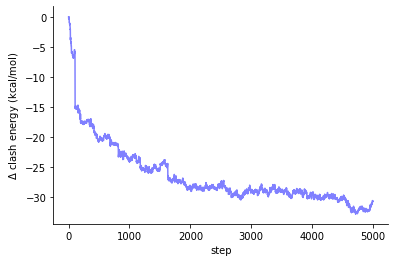

In [12]:

fig, ax = plt.subplots()
ax.plot(np.cumsum(dE))
ax.set_xlabel('step')
ax.set_ylabel(r'$\rm\Delta$ clash energy (kcal/mol)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

fig.savefig('trajectoty.png', bbox_inches='tight', dpi=1000)

In [4]:
L135R1_repack = xl.SpinLabel.from_trajectory(traj, 135, burn_in=1000)
K277R1_repack = xl.SpinLabel.from_trajectory(traj, 277, burn_in=1000)
resis = [res.resnum for res in omp.select_atoms('around 14 resnum 135').residues] + [res.resnum for res in omp.select_atoms('around 14 resnum 277').residues]

neighbors = [xl.RotamerEnsemble.from_trajectory(traj, resi, burn_in=1000) for resi in resis]
neighbors = [resi for resi in neighbors if len(resi) > 1]

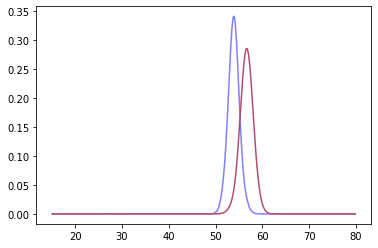

In [6]:
r = np.linspace(15, 80, 256)
P = xl.distance_distribution(L135R1, K277R1, r)
P_repack = xl.distance_distribution(L135R1_repack, K277R1_repack, r)

fig, ax = plt.subplots()
ax.plot(r, P)
ax.plot(r, P_repack)
plt.show()

In [27]:
xl.save('L135R1_K277R1.pdb', L135R1, K277R1, omp, KDE=False)
xl.save('L135R1_K277R1_repack.pdb', L135R1_repack, K277R1_repack, *neighbors, omp, KDE=False)

r = np.linspace(15, 80, 256)
dd = xl.distance_distribution(L135R1, K277R1, r)
dd_repack  = xl.distance_distribution(L135R1_repack, K277R1_repack, r)

plt.plot(r, dd)
plt.plot(r, dd_repack)
plt.show()